In [ ]:
import numpy as np
import pywt
import matplotlib.pyplot as plt
import imageio
from scipy import signal

# 1. Generate a sample noisy signal
np.random.seed(0)
t = np.linspace(0, 1, 500)
original_signal = signal.sawtooth(2 * np.pi * 5 * t)  # Original signal
noise = np.random.normal(0, 0.5, t.shape)
noisy_signal = original_signal + noise  # Noisy signal

# 2. Define wavelet and apply wavelet transform
wavelet = "db4"  # Daubechies wavelet
coeffs = pywt.wavedec(noisy_signal, wavelet, level=5)

# 3. Denoising by thresholding coefficients
threshold = 0.3  # Set threshold for denoising
coeffs_thresholded = [pywt.threshold(c, threshold * max(c)) for c in coeffs]

# 4. Initialize list for frames
frames = []

# 5. Reconstruct the signal at each thresholding level and save each frame
for i in range(1, len(coeffs_thresholded) + 1):
    # Zero out coefficients above level i
    coeffs_temp = coeffs_thresholded[:i] + [
        np.zeros_like(c) for c in coeffs_thresholded[i:]
    ]
    denoised_signal = pywt.waverec(coeffs_temp, wavelet)

    # Plot the original, noisy, and partially denoised signal
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(t, noisy_signal, label="Noisy Signal", color="gray", alpha=0.6)
    ax.plot(t, original_signal, label="Original Signal", color="black", linestyle="--")
    ax.plot(t, denoised_signal, label=f"Wavelet Denoising (Level {i})", color="blue")
    ax.legend()
    ax.set_title(f"Wavelet Denoising Progression - Level {i}")
    ax.set_xlabel("Time")
    ax.set_ylabel("Amplitude")

    # Save frame as image in memory
    fig.canvas.draw()
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype="uint8")
    image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    frames.append(image)
    plt.close(fig)  # Close figure to save memory

# 6. Save frames as a GIF
imageio.mimsave("wavelet_transform_denoising.gif", frames, fps=2)
print("GIF saved as 'wavelet_transform_denoising.gif'")

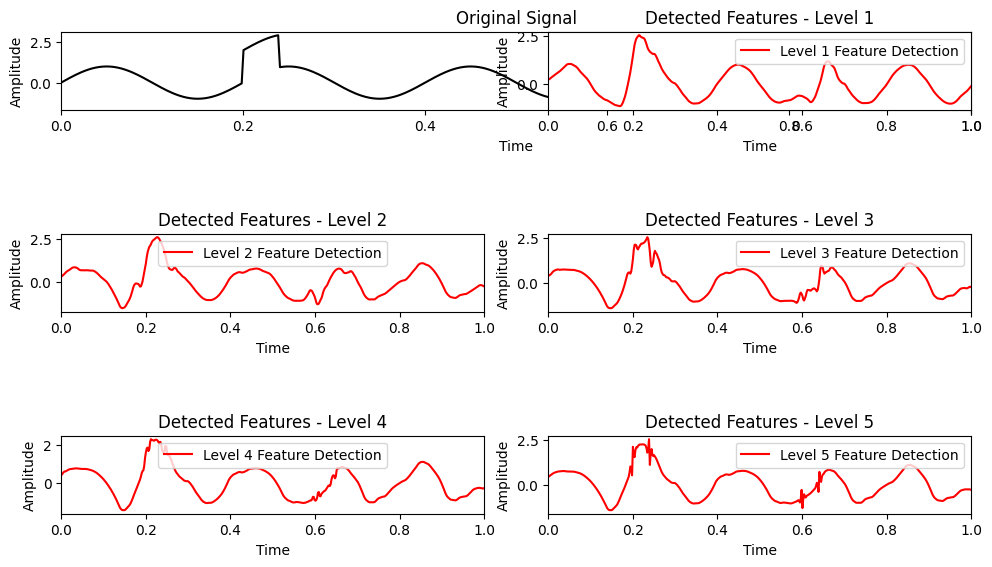

In [5]:
import numpy as np
import pywt
import matplotlib.pyplot as plt

# Generate a synthetic signal with features
np.random.seed(0)
t = np.linspace(0, 1, 500)
signal = np.sin(2 * np.pi * 5 * t)  # Base signal (5 Hz)
signal[100:120] += 2  # Add a spike (feature at t=0.2)
signal[300:320] -= 1.5  # Add another feature (t=0.6)

# Perform wavelet decomposition (using Daubechies 4 wavelet)
wavelet = "db4"
max_level = 5  # Maximum decomposition level
coeffs = pywt.wavedec(signal, wavelet, level=max_level)

# Plot the original signal with features
plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)
plt.plot(t, signal, label="Original Signal with Features", color="black")
plt.title("Original Signal")
plt.xlim(0, 1)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend()

# Plot the wavelet transform coefficients at different levels
for i in range(1, max_level + 1):
    plt.subplot(3, 2, i + 1)
    # Plot detail coefficients for the current level
    # Zero out other levels to highlight the current level's detail coefficients
    coeffs_temp = [
        coeffs[0] if j == 0 else np.zeros_like(coeff) for j, coeff in enumerate(coeffs)
    ]
    coeffs_temp[i] = coeffs[i]  # Keep the detail coefficients for level i

    # Reconstruct the signal using only the current level's details
    feature_detection = pywt.waverec(coeffs_temp, wavelet)
    plt.plot(
        t,
        feature_detection[: len(signal)],
        label=f"Level {i} Feature Detection",
        color="red",
    )
    plt.title(f"Detected Features - Level {i}")
    plt.xlim(0, 1)
    plt.xlabel("Time")
    plt.ylabel("Amplitude")
    plt.legend()

plt.tight_layout()
plt.show()